## Kaggle URL

* https://www.kaggle.com/competitions/titanic


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
train = pd.read_csv("data/titanic/train.csv")
train.shape

(891, 12)

In [3]:
test = pd.read_csv("data/titanic/test.csv")
test.shape

(418, 11)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## info

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## histogram

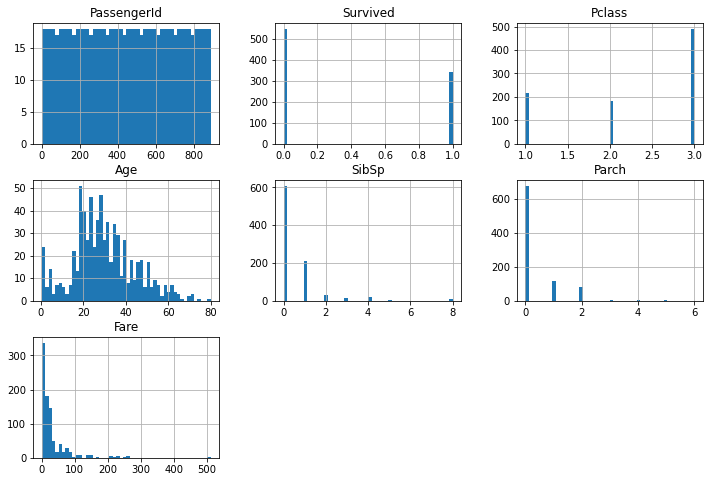

In [6]:
_ = train.hist(figsize=(12, 8), bins=50)

## 파생변수 만들기

### 가족의 수
* 가족의 수 == Parch + SibSp + 1(나)

In [14]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2


In [15]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1


### 성별

In [26]:
train["Sex_encode"] = (train["Sex"] == "female")
test["Sex_encode"] = (test["Sex"] == "female")
display(train.head(1))
test.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sex_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,False


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sex_encode
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,False


### 호칭

In [27]:
"Braund, Mr. Owen Harris".split(",")[1].split(".")[0].strip()

'Mr'

In [28]:
train["Title"] = train["Name"].map(lambda x : x.split(",")[1].split(".")[0].strip())
test["Title"] = test["Name"].map(lambda x : x.split(",")[1].split(".")[0].strip())
display(train.head(1))
test.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sex_encode,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,False,Mr


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sex_encode,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,False,Mr


### Cabin

In [29]:
train["Cabin_initail"] = train["Cabin"].str[0]
test["Cabin_initail"] = test["Cabin"].str[0]
display(train.head(1))
test.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sex_encode,Title,Cabin_initail
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,False,Mr,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Sex_encode,Title,Cabin_initail
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,False,Mr,NaN


## One-Hot-Encoding

* pandas에서는 Ordinal-Encoding을 category 타입에 대해서 cat 속성의 codes 속성으로 지원하고 있습니다.
* pandas에서는 One-Hot-Encoding을 get_dummies 메서드로 지원하고 있습니다.
* sklearn에서는 Ordinal-Encoding을 OrdinalEncoder 객체로 지원하고 있습니다.
* sklearn에서는 One-Hot-Encoding을 OneHotEncoder 객체로 지원하고 있습니다.

In [18]:
# One-Hot-Encoding
# train["Embarked_S"] = train["Embarked"] == "S"
# train["Embarked_C"] = train["Embarked"] == "C"
# train["Embarked_Q"] = train["Embarked"] == "Q"

# train[["Embarked", "Embarked_S", "Embarked_C", "Embarked_Q"]].tail(5)

In [58]:
# test["Embarked_S"] = test["Embarked"] == "S"
# test["Embarked_C"] = test["Embarked"] == "C"
# test["Embarked_Q"] = test["Embarked"] == "Q"

# test[["Embarked", "Embarked_S", "Embarked_C", "Embarked_Q"]].tail(5)

In [20]:
# Ordinal-Encoding
# train["Embarked"].astype("category").cat.codes

In [17]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilySize       int64
dtype: object

In [18]:
pd.get_dummies(train)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,4,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## 결측치 대체

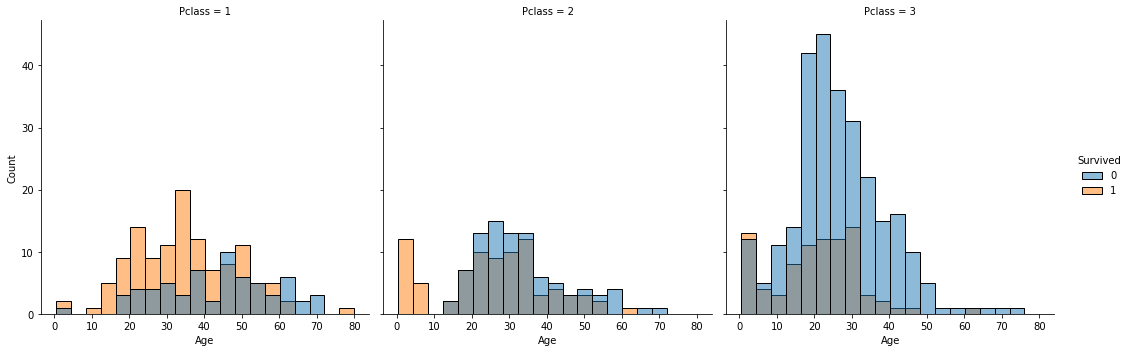

In [19]:
sns.displot(data=train, x="Age", hue="Survived", col="Pclass")

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

## 학습과 예측 전체 과정

* feature_names : 학습(훈련), 예측에 사용할 컬럼을 리스트 형태로 만들어서 변수에 담아줍니다.
* label_name : 정답값

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)


In [22]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

## 정답값이자 예측해야 될 값

In [37]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
lable_name = "Survived"
lable_name

'Survived'

## 학습, 예측에 사용할 컬럼

In [21]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

In [24]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = ['Pclass', 'Age', 'Ticket', 'Fare',
                 'Cabin', 'Embarked', 'FamilySize',
                 'Sex_encode', 'Title', 'Cabin_initail']
feature_names

['Pclass',
 'Age',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'FamilySize',
 'Sex_encode',
 'Title',
 'Cabin_initail']

In [30]:
train[feature_names].select_dtypes(exclude="number").nunique()

Ticket           681
Cabin            147
Embarked           3
Sex_encode         2
Title             17
Cabin_initail      8
dtype: int64

In [31]:
test[feature_names].select_dtypes(exclude="number").nunique()

Ticket           363
Cabin             76
Embarked           3
Sex_encode         2
Title              9
Cabin_initail      7
dtype: int64

In [72]:
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [73]:
test["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [74]:
train["Title"].value_counts().head()

Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Name: Title, dtype: int64

In [75]:
train["Title_other"] = train["Title"]
test["Title_other"] = test["Title"]

In [81]:
title_other = train["Title"].value_counts().head().index
title_other

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr'], dtype='object')

In [82]:
train.loc[~train["Title"].isin(title_other), "Title_other"] = "Other"
train["Title_other"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      20
Dr          7
Name: Title_other, dtype: int64

In [83]:
test.loc[~test["Title"].isin(title_other), "Title_other"] = "Other"
test["Title_other"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       6
Dr          1
Name: Title_other, dtype: int64

In [102]:
feature_names = ['Pclass', 'Age', 'Fare', 
                 'Embarked', 'FamilySize',
                 'Sex_encode', 'Title_other']
feature_names

['Pclass',
 'Age',
 'Fare',
 'Embarked',
 'FamilySize',
 'Sex_encode',
 'Title_other']

## 학습, 예측 데이터셋 만들기


<img src="https://i.imgur.com/yvBtRtJ.png" width="600">

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

In [103]:
# X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
# 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제
X_train = pd.get_dummies(train[feature_names])
X_train = X_train.fillna(0)
X_train.shape

(891, 14)

In [104]:
# X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
# 예측에 사용할 데이터셋 예) 실전 시험문제
X_test = pd.get_dummies(test[feature_names])
X_test = X_test.fillna(0)
X_test.shape

(418, 14)

In [105]:
# y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
# 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답
y_train = train[lable_name]
y_train.shape

(891,)

## 머신러닝 알고리즘 가져오기
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)


* 결과를 해석하고 이해하기 쉽다.간략한 설명만으로 결정 트리를 이해하는 것이 가능하다.
* 자료를 가공할 필요가 거의 없다.다른 기법들의 경우 자료를 정규화하거나 임의의 변수를 생성하거나 값이 없는 변수를 제거해야 하는 경우가 있다.
* 수치 자료와 범주 자료 모두에 적용할 수 있다.다른 기법들은 일반적으로 오직 한 종류의 변수를 갖는 데이터 셋을 분석하는 것에 특화되어 있다. (일례로 신경망 학습은 숫자로 표현된 변수만을 다룰 수 있는 것에 반해 관계식(relation rules)은 오직 명목 변수만을 다룰 수 있다.
* 화이트박스 모델을 사용한다. 모델에서 주어진 상황이 관측 가능하다면 불 논리를 이용하여 조건에 대해 쉽게 설명할 수 있다. (결과에 대한 설명을 이해하기 어렵기 때문에 인공신경망은 대표적인 블랙 박스 모델이다.)
* 안정적이다. 해당 모델 추리의 기반이 되는 명제가 다소 손상되었더라도 잘 동작한다.
* 대규모의 데이터 셋에서도 잘 동작한다. 방대한 분량의 데이터를 일반적인 컴퓨터 환경에서 합리적인 시간 안에 분석할 수 있다.


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # The number of features to consider when looking for the best split
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```

* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 기능입니다.
    * max_depth: 트리의 최대 깊이입니다.
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수입니다.
    * max_leaf_nodes: 리프 노드 숫자의 제한치입니다.
    * random_state: 추정기의 무작위성을 제어합니다. 실행했을 때 같은 결과가 나오도록 합니다.

In [134]:
# max_depth == 1 트리의 깊이를 의미합니다.
# max_features == 0.9 라면 전체 피처의 90% 만 사용합니다.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

## cross validate

* cross_validate : Evaluate metric(s) by cross-validation and also record fit/score times.
* cross_val_score : Evaluate a score by cross-validation.
* cross_val_predict : Generate cross-validated estimates for each input data point.

In [135]:
from sklearn.model_selection import cross_validate

cvr = cross_validate(model, X_train, y_train, cv=3)
print(cvr)
cvr["test_score"].mean()

{'fit_time': array([0.00464582, 0.00441885, 0.00487399]), 'score_time': array([0.00222588, 0.00255609, 0.00209713]), 'test_score': array([0.78114478, 0.8013468 , 0.78787879])}


0.7901234567901234

In [136]:
from sklearn.model_selection import cross_val_score

cvscore = cross_val_score(model, X_train, y_train, cv=3)
print(cvscore)
cvscore.mean()

[0.78114478 0.8013468  0.78787879]


0.7901234567901234

In [137]:
from sklearn.model_selection import cross_val_predict

y_val_predict = cross_val_predict(model, X_train, y_train, cv=3)
y_val_predict[:5]

array([0, 1, 0, 1, 0])

## 정확도(Accuracy) 측정하기

* 모델이 얼마나 잘 예측했는지 측정해 봅니다.
* 시험을 보고 나서 몇 개 맞았는지 틀렸는지 채점해 보는 과정과 유사하다고 보면 됩니다.
* 실전 문제에서는 답이 없어서 우리가 예측을 해야겠지만 이 실습은 정답이 있는 모의고사 입니다. 
* 모의고사를 보면 내 실력이 어느정도 되는지 예측해 보는 것처럼 점수를 측정해 봅니다.

In [138]:
val_acc = (y_train == y_val_predict).mean()
val_acc

0.7901234567901234

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [142]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<AxesSubplot:>

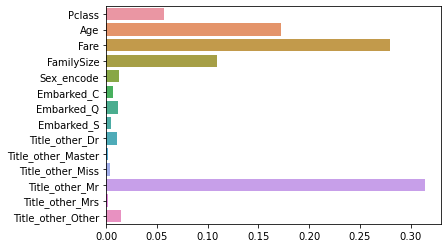

In [144]:
# 피처의 중요도 시각화 하기
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [146]:
y_predict = model.predict(X_test)
y_predict[:10]

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

## 캐글에 제출하기

In [148]:
df_submit = pd.read_csv("data/titanic/gender_submission.csv")
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df_submit["Survived"] = y_predict
df_submit.head()

In [154]:
file_name = f"data/titanic/submit_{val_acc:.3f}.csv"
file_name

'data/titanic/submit_0.790.csv'

In [157]:
df_submit.to_csv(file_name, index=False)

In [158]:
pd.read_csv(file_name)

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
